In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
sns.set()
from datetime import datetime,timedelta

In [ ]:
df = pd.read_excel('/content/sales_data.xlsx')

df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [ ]:
df.info


<bound method DataFrame.info of       CustomerID  TOTAL_ORDERS   REVENUE  AVERAGE_ORDER_VALUE  \
0             22           124  11986.54                96.67   
1             29            82  11025.96               134.46   
2             83            43   7259.69               168.83   
3             95            44   6992.27               158.92   
4            124            55   6263.44               113.88   
...          ...           ...       ...                  ...   
4995      173946             1    117.49               117.49   
4996      173987             1    117.49               117.49   
4997      174004             1    117.49               117.49   
4998      174038             1    117.49               117.49   
4999      200783             2     94.14                47.07   

      CARRIAGE_REVENUE  AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  \
0               529.59             4.27       2016-12-30        2021-10-24   
1                97.92         

In [ ]:
df.corr()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
CustomerID,1.000000,-0.608092,-0.556489,-0.226023,-0.576043,0.025649,0.279182,0.375343,-0.470777,-0.473127,...,-0.463766,-0.491788,-0.294194,-0.479409,-0.525385,-0.472961,-0.265095,-0.408657,-0.477957,-0.427217
TOTAL_ORDERS,-0.608092,1.000000,0.771996,-0.065208,0.875733,-0.007855,-0.311838,-0.256272,0.741049,0.766660,...,0.644590,0.663521,0.498192,0.804704,0.861575,0.756866,0.380336,0.593952,0.656071,0.565907
REVENUE,-0.556489,0.771996,1.000000,0.366302,0.655447,-0.048932,-0.257746,-0.197782,0.590764,0.624238,...,0.857369,0.841502,0.387685,0.606809,0.664253,0.598595,0.474491,0.769682,0.848650,0.742100
AVERAGE_ORDER_VALUE,-0.226023,-0.065208,0.366302,1.000000,-0.100842,-0.076141,-0.088756,-0.061769,-0.036218,-0.030172,...,0.305416,0.336919,-0.035982,-0.064526,-0.052744,-0.039114,0.156969,0.260563,0.320375,0.291733
CARRIAGE_REVENUE,-0.576043,0.875733,0.655447,-0.100842,1.000000,0.277900,-0.312772,-0.231617,0.651003,0.665464,...,0.552647,0.549227,0.464812,0.712443,0.765135,0.629639,0.346697,0.502783,0.571861,0.455406
AVERAGESHIPPING,0.025649,-0.007855,-0.048932,-0.076141,0.277900,1.000000,-0.084904,0.104563,-0.000875,-0.001364,...,-0.036116,-0.065299,0.028585,0.004779,-0.000934,-0.039176,0.009738,-0.031486,-0.031684,-0.068210
AVGDAYSBETWEENORDERS,0.279182,-0.311838,-0.257746,-0.088756,-0.312772,-0.084904,1.000000,0.054743,-0.216227,-0.222975,...,-0.197848,-0.236006,-0.168915,-0.251694,-0.268035,-0.229511,-0.138387,-0.194264,-0.221773,-0.185189
DAYSSINCELASTORDER,0.375343,-0.256272,-0.197782,-0.061769,-0.231617,0.104563,0.054743,1.000000,-0.199247,-0.199338,...,-0.182017,-0.209898,-0.123382,-0.214157,-0.226500,-0.181582,-0.089109,-0.152151,-0.177786,-0.138213
MONDAY_ORDERS,-0.470777,0.741049,0.590764,-0.036218,0.651003,-0.000875,-0.216227,-0.199247,1.000000,0.519452,...,0.491319,0.503856,0.356378,0.597853,0.638433,0.565423,0.281904,0.441408,0.500867,0.452333
TUESDAY_ORDERS,-0.473127,0.766660,0.624238,-0.030172,0.665464,-0.001364,-0.222975,-0.199338,0.519452,1.000000,...,0.529672,0.524633,0.348824,0.621192,0.662220,0.589753,0.282089,0.488838,0.540816,0.448681


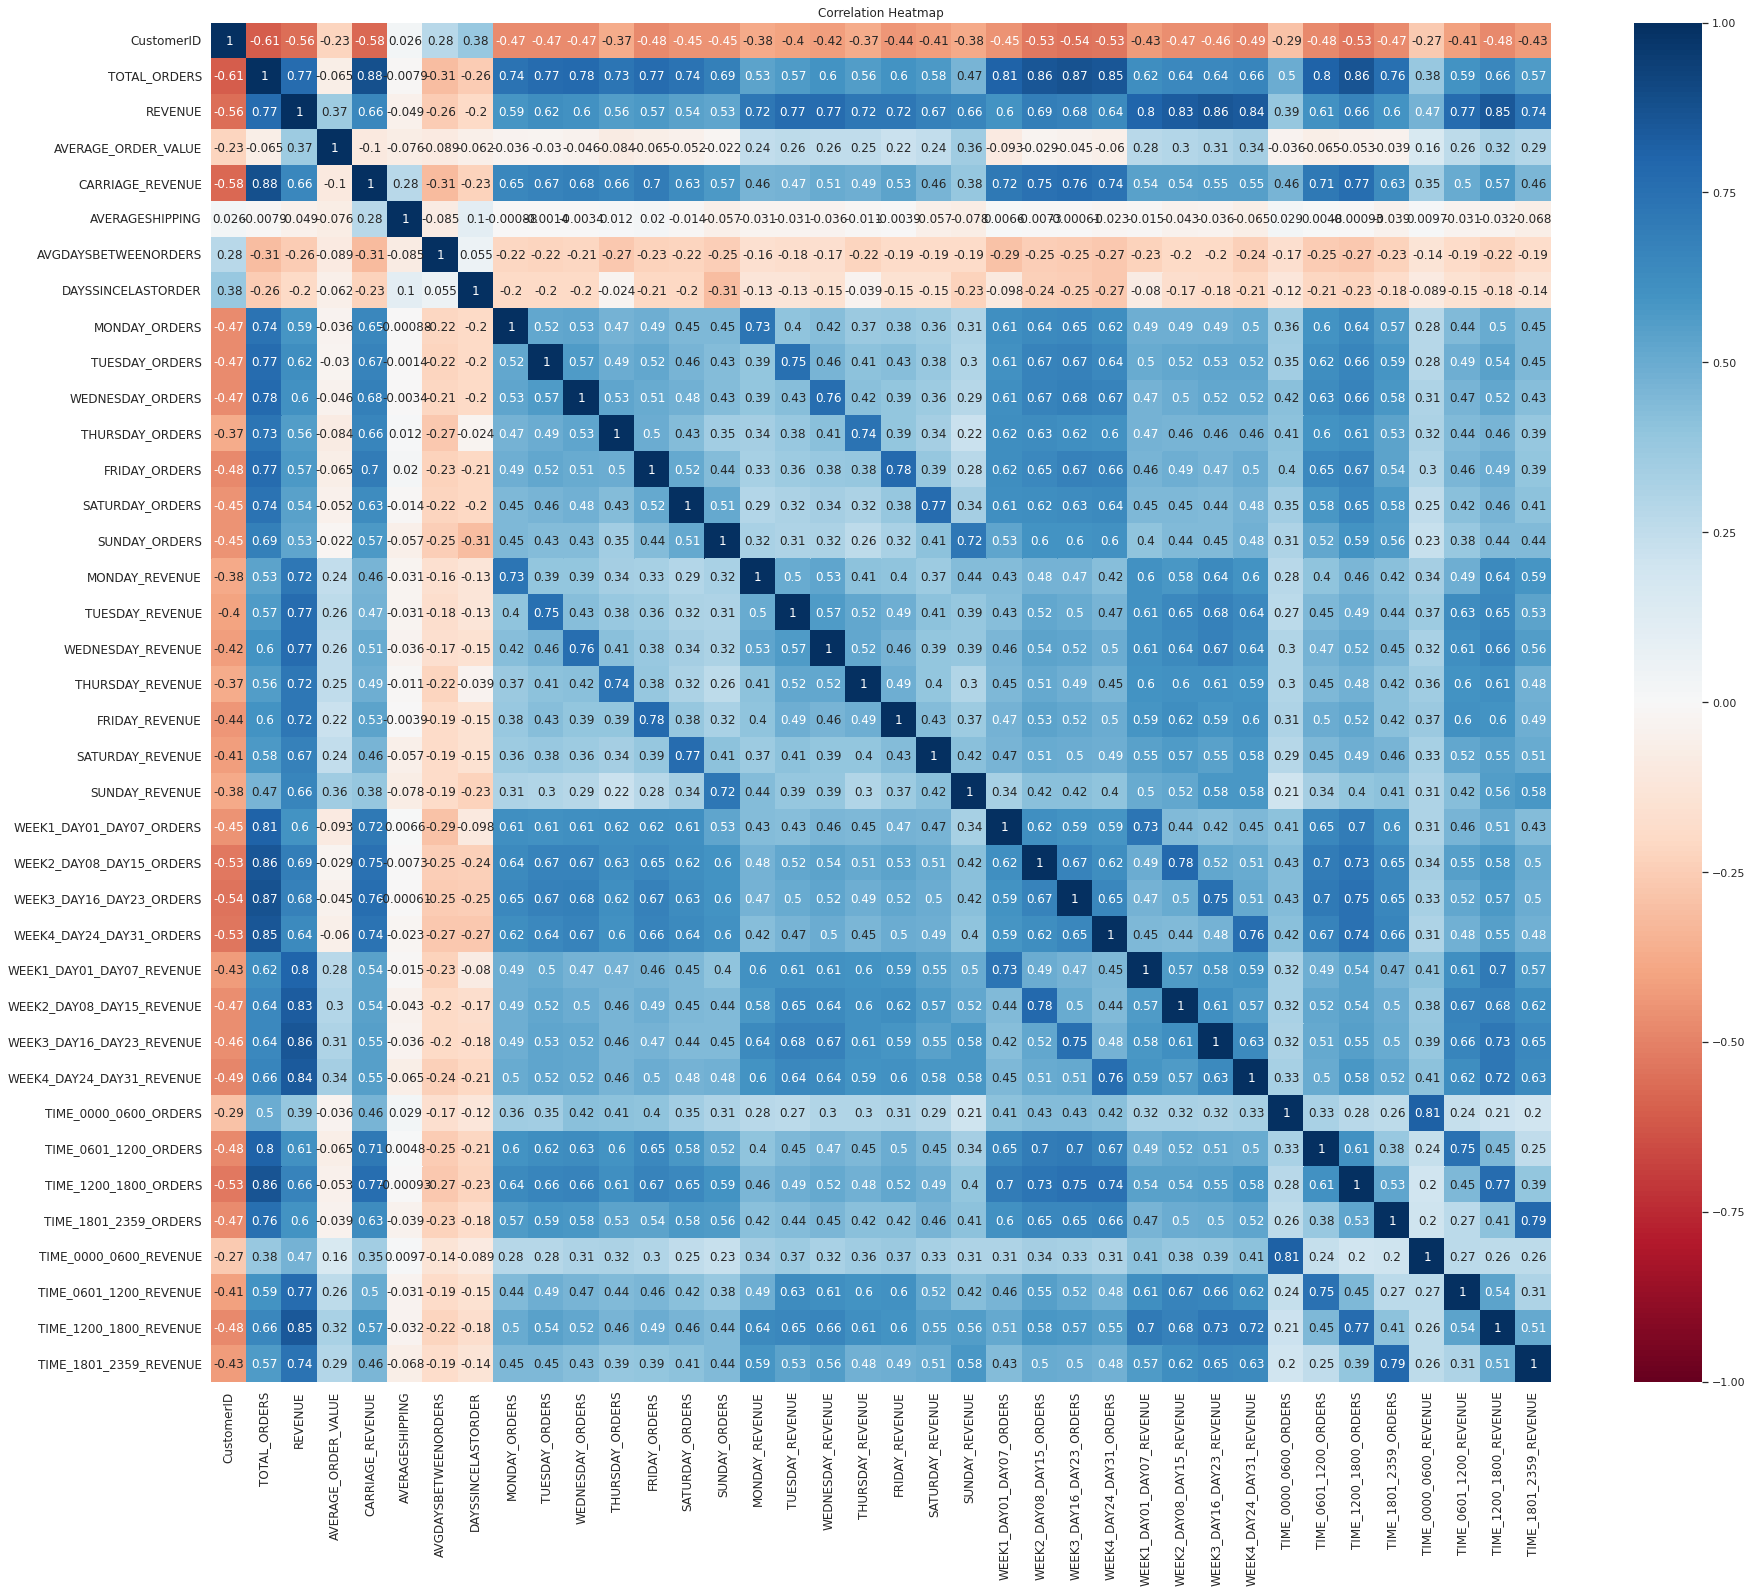

In [ ]:
plt.figure(figsize = (30,25))
s = sns.heatmap(df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90,fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

df = df[df['CustomerID'].notna()]
df


,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00


Checking for Duplicate Values

In [ ]:
duplicate = df[df.duplicated(['CustomerID'])]
duplicate

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE


In [ ]:
#Shape of the data set
df.shape

(5000, 40)

Checking for NUll values

In [ ]:
df.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [ ]:
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


Now lets Calculate Recency,Frequency,Monetary Values

In [ ]:
df['LATEST_ORDER_DATE']= pd.to_datetime(df['LATEST_ORDER_DATE'],format = '%d-%m-%Y')
df['LATEST_ORDER_DATE']

0      2021-10-24
1      2021-10-24
2      2021-10-24
3      2021-10-24
4      2021-10-24
          ...    
4995   2021-04-01
4996   2021-04-01
4997   2021-04-01
4998   2021-04-01
4999   2021-04-01
Name: LATEST_ORDER_DATE, Length: 5000, dtype: datetime64[ns]

In [ ]:
df['Diff'] = max(df['LATEST_ORDER_DATE'])-df['LATEST_ORDER_DATE']

In [ ]:
recency = df.groupby('CustomerID')['Diff'].min()
#recency['Diff'] = recency['Diff'].dt.days
recency = recency.reset_index()

recency['Diff'] = recency['Diff'].dt.days
recency.columns=['CustomerID','Recency']
recency.head(20)

,CustomerID,Recency
0,1,52
1,2,93
2,3,52
3,4,4
4,5,129
5,6,31
6,7,115
7,8,61
8,9,111
9,10,12


Last order Purchasing Date

In [ ]:
max(df['LATEST_ORDER_DATE'])

Timestamp('2021-10-24 00:00:00')

Recency is Given Below

In [ ]:
recency.CustomerID = df.CustomerID
recency

,CustomerID,Recency
0,22,52
1,29,93
2,83,52
3,95,4
4,124,129
...,...,...
4995,173946,53
4996,173987,118
4997,174004,127
4998,174038,131


Recency Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


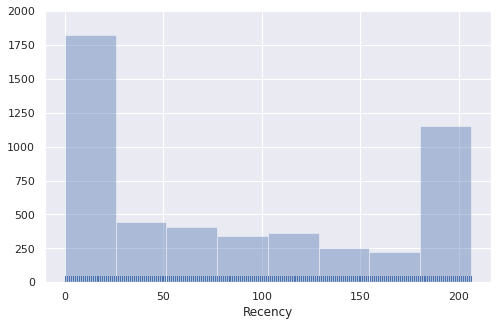

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(recency.Recency,bins=8,kde=False,rug=True)

Now we will Calulate the Frequency

In [ ]:
# Calculate the frequency of purchases
frequency_df = df.groupby(by=df['CustomerID'], as_index=False)['TOTAL_ORDERS']
frequency_df

In [ ]:
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

0       124
1        82
2        43
3        44
4        55
       ... 
4995      1
4996      1
4997      1
4998      1
4999      2
Name: TOTAL_ORDERS, Length: 5000, dtype: int64

Below is the Frequency:

In [ ]:
frequency_df = df[['CustomerID','TOTAL_ORDERS']]
frequency_df.columns = ['CustomerID','Frequency']
frequency_df 

,CustomerID,Frequency
0,22,124
1,29,82
2,83,43
3,95,44
4,124,55
...,...,...
4995,173946,1
4996,173987,1
4997,174004,1
4998,174038,1


Frequency Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


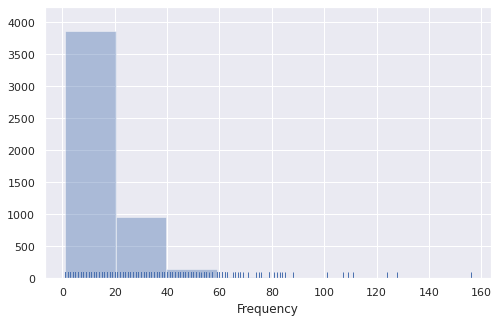

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(frequency_df.Frequency,bins=8,kde=False,rug=True)

Calulate the Monetary value of all the Customers

In [ ]:
# Create column total cost
#df['TotalCost'] = df['REVENUE']
#monetary_df = df.groupby(by=df['CustomerID'],as_index=False)#.agg({'TotalCost': 'sum'})
monetary_df= df[['CustomerID','REVENUE']]
monetary_df.columns=['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,22,11986.54
1,29,11025.96
2,83,7259.69
3,95,6992.27
4,124,6263.44


Monetary Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


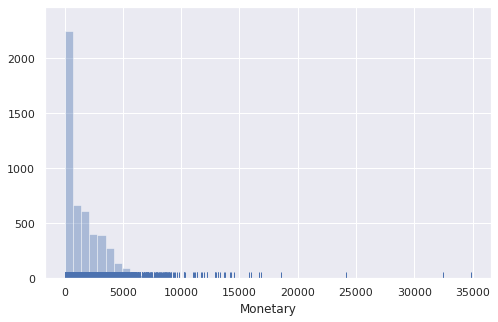

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(monetary_df.Monetary,kde=False,rug=True)

In [ ]:
# ## Create RFM Table
# Merge recency dataframe with frequency dataframe
temp_df = recency.merge(frequency_df,on='CustomerID')
temp_df.head()
# Merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
# Use CustomerID as index
#rfm_df.set_index('CustomerID',inplace=True)
# Check the head
rfm_df.head(30)

,CustomerID,Recency,Frequency,Monetary
0,22,52,124,11986.54
1,29,93,82,11025.96
2,83,52,43,7259.69
3,95,4,44,6992.27
4,124,129,55,6263.44
5,153,31,49,5841.24
6,187,115,43,5470.27
7,219,61,54,5200.53
8,258,111,19,4967.06
9,308,12,21,4726.38


Now we split the metrics into segments using quantiles.We assign a score from 1 to 4 to Recency, Frequency and Monetary. One is the best/highest value, and four is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [ ]:
segmented_rfm = rfm_df.copy()


In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,22,52,124,11986.54,2,1,1
1,29,93,82,11025.96,3,1,1
2,83,52,43,7259.69,2,1,1
3,95,4,44,6992.27,1,1,1
4,124,129,55,6263.44,3,1,1


Best Recency score = 1: Purchased very recently. Best Frequency score = 1: highest quantity purchases. Best Monetary score = 1: spent the most.

In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,22,52,124,11986.54,2,1,1,211
1,29,93,82,11025.96,3,1,1,311
2,83,52,43,7259.69,2,1,1,211
3,95,4,44,6992.27,1,1,1,111
4,124,129,55,6263.44,3,1,1,311
5,153,31,49,5841.24,2,1,1,211
6,187,115,43,5470.27,3,1,1,311
7,219,61,54,5200.53,2,1,1,211
8,258,111,19,4967.06,3,2,1,321
9,308,12,21,4726.38,2,1,1,211


In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,22,52,124,11986.54,2,1,1,211,4
1,29,93,82,11025.96,3,1,1,311,5
2,83,52,43,7259.69,2,1,1,211,4
3,95,4,44,6992.27,1,1,1,111,3
4,124,129,55,6263.44,3,1,1,311,5
5,153,31,49,5841.24,2,1,1,211,4
6,187,115,43,5470.27,3,1,1,311,5
7,219,61,54,5200.53,2,1,1,211,4
8,258,111,19,4967.06,3,2,1,321,6
9,308,12,21,4726.38,2,1,1,211,4


In [ ]:
print("Champions: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Potential Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Champions:  209
Potential Customers:  1142
Big Spenders:  1250
Lost Customers:  200
Lost Cheap Customers:  471


In [ ]:
segment = [0]*len(segmented_rfm)

Champion = list(segmented_rfm.loc[segmented_rfm['RFM_Segment']=='111'].index)
lost_cheap = list(segmented_rfm.loc[segmented_rfm['RFM_Segment']=='444'].index)
lost = list(segmented_rfm.loc[segmented_rfm['RFM_Segment']=='133'].index)
Potential = list(segmented_rfm.loc[segmented_rfm['RFM_Segment']=='211'].index)
Lost_cheap = list(segmented_rfm.loc[segmented_rfm['RFM_Segment']=='344'].index)
Big_spenders = list(segmented_rfm.loc[segmented_rfm['RFM_Segment']=='344'].index)
for i in range(0,len(segmented_rfm)):
    if segmented_rfm['RFM_Segment'][i]=='444':
        segment[i]='Lost Cheap Customers'
    elif segmented_rfm['RFM_Segment'][i]=='133':
        segment[i]='Lost Customers'
    elif segmented_rfm['RFM_Segment'][i]=='211':
        segment[i]='Potential Customers'
    elif segmented_rfm['RFM_Segment'][i]=='111':
        segment[i]='Champion Customers'
    elif segmented_rfm['RFM_Segment'][i]=='344':
        segment[i]='Lost Cheap Customers'
    elif segmented_rfm['RFM_Segment'][i]=='311':
        segment[i]='Big_spenders Customers'
    else:
        segment[i]='Others'
segmented_rfm['segment'] = segment

In [ ]:
segmented_rfm.head(30)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,segment
0,22,52,124,11986.54,2,1,1,211,4,Potential Customers
1,29,93,82,11025.96,3,1,1,311,5,Big_spenders Customers
2,83,52,43,7259.69,2,1,1,211,4,Potential Customers
3,95,4,44,6992.27,1,1,1,111,3,Champion Customers
4,124,129,55,6263.44,3,1,1,311,5,Big_spenders Customers
5,153,31,49,5841.24,2,1,1,211,4,Potential Customers
6,187,115,43,5470.27,3,1,1,311,5,Big_spenders Customers
7,219,61,54,5200.53,2,1,1,211,4,Potential Customers
8,258,111,19,4967.06,3,2,1,321,6,Others
9,308,12,21,4726.38,2,1,1,211,4,Potential Customers
